In [ ]:
# This program uses LSTM(Long Short Term Memory) 
# It predicts the closing stock price of a company (Amazon) using 2 monts of data

In [ ]:
import math
import pandas as pd
import numpy as np
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [ ]:
#get the stock data
df = web.DataReader("AMZN",data_source="yahoo",start="2012-01-01",end="2020-05-31")
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,179.479996,175.550003,175.889999,179.029999,5110800,179.029999
2012-01-04,180.500000,176.070007,179.210007,177.509995,4205200,177.509995
2012-01-05,178.250000,174.050003,175.940002,177.610001,3809100,177.610001
2012-01-06,184.649994,177.500000,178.070007,182.610001,7008400,182.610001
2012-01-09,184.369995,177.000000,182.759995,178.559998,5056900,178.559998
...,...,...,...,...,...,...
2020-05-22,2469.850098,2430.129883,2455.010010,2436.879883,2867100,2436.879883
2020-05-26,2462.000000,2414.060059,2458.000000,2421.860107,3568200,2421.860107
2020-05-27,2413.580078,2330.000000,2404.989990,2410.389893,5056900,2410.389893


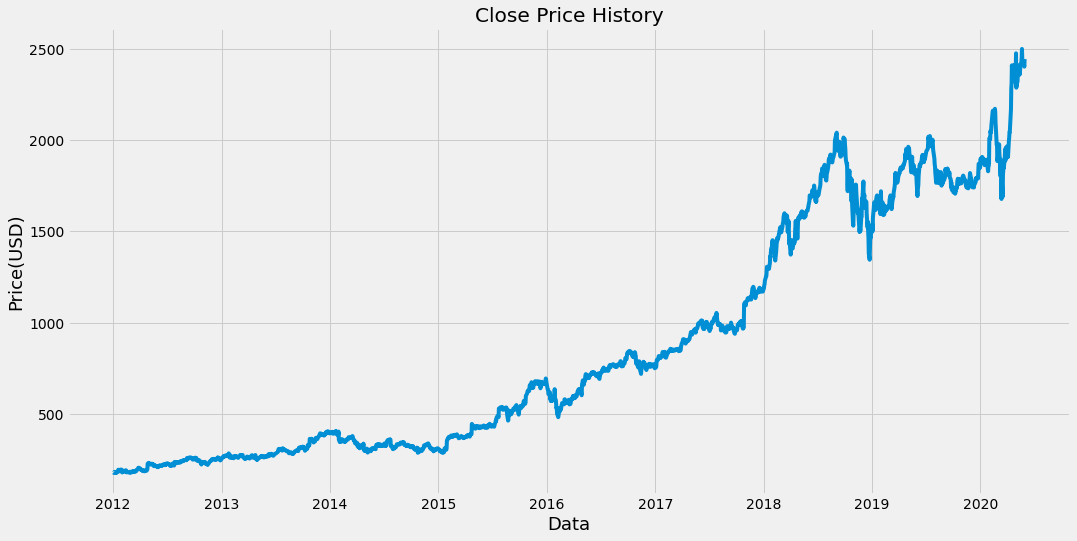

In [ ]:
#visualization of closing price
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df["Close"])
plt.xlabel("Data", fontsize=18)
plt.ylabel("Price(USD)", fontsize=18)
plt.show()

In [ ]:
#Dataframe with only close column
data=df.filter(["Close"])

#numpy array
dataset = data.values

#training lenght
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

1692

In [ ]:
#Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))#inclusive of 0,1
scale_data= scaler.fit_transform(dataset)
scale_data

array([[1.33505289e-03],
       [6.80445763e-04],
       [7.23514529e-04],
       ...,
       [9.62295575e-01],
       [9.58294820e-01],
       [9.76068223e-01]])

In [ ]:
#creating training dataset
#creating scaled training dataset
train_data= scale_data[0:training_data_len,:]

#splitting data into x-train and y-train
x_train=[]#indipendent features
y_train=[]#dependent features

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [ ]:
#converting x_label and y_label to numpy array
x_train=np.array(x_train)
y_train=np.array(y_train)


In [ ]:
#reshaping(currently our x_train dataset is 2d but lstm expects data to be 3d in the form of no. of samples, no. of timesteps and no. of features)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))#only one feature close
x_train.shape

(1632, 60, 1)

In [ ]:
#Building LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))#we are not going to add any more LSTM layers 
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compiling the model
model.compile(optimizer="adam",loss="mean_squared_error")#optimizer is used to improve upon the loss function  and loss fuction finds how well the model did on training


In [ ]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

Epoch 1/1
1632/1632 [==============================] - 64s 39ms/step - loss: 8.2492e-04


In [ ]:
#testing dataset
test_data=scale_data[training_data_len-60: ,:]
x_test=[]
y_test=dataset[training_data_len:,:]#all the values that the model has to predict
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#converting data to numpy array
x_test=np.array(x_test)

In [ ]:
#reshape data
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
#prediction
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [ ]:
#get the root mean squared error(RMSE)-to check the accuracy of the model
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

80.78956242281149

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


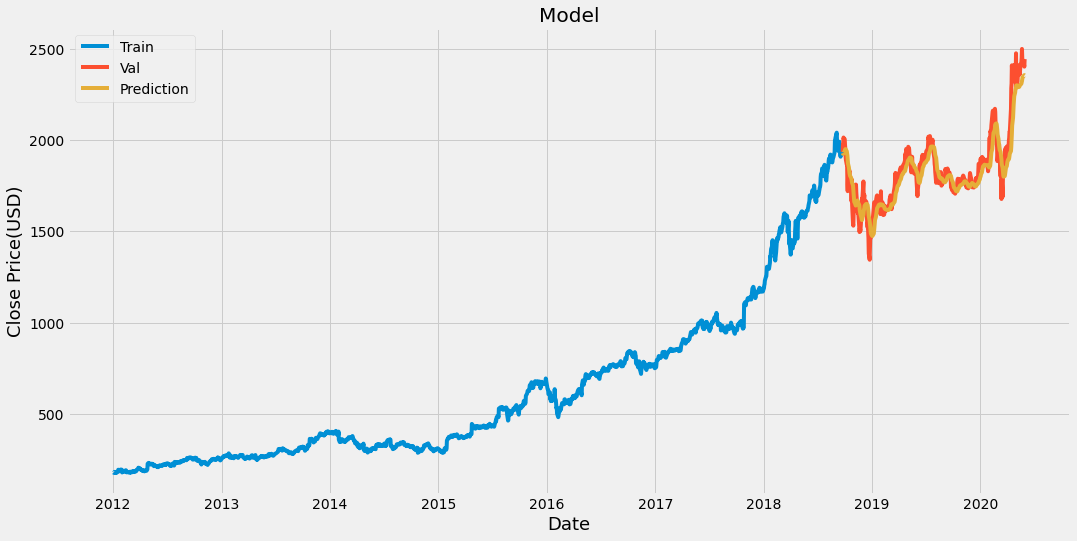

In [ ]:
#ploting the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid["Predictions"]=predictions
#visualization
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price(USD)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close","Predictions"]])
plt.legend(["Train","Val","Prediction"])
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2018-09-24,1934.359985,1927.893066
2018-09-25,1974.550049,1923.928589
2018-09-26,1974.849976,1923.793335
2018-09-27,2012.979980,1925.726440
2018-09-28,2003.000000,1931.488647
...,...,...
2020-05-22,2436.879883,2343.066895
2020-05-26,2421.860107,2349.862793
2020-05-27,2410.389893,2353.634766


In [ ]:
#get quote
apple_quote = web.DataReader("AMZN",data_source="yahoo",start="2012-01-01",end="2020-05-31")
new_df = apple_quote.filter(["Close"])
#last 60 days closing values
last_60_days= new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
#converting data set to numpy array
X_test=np.array(X_test)
#reshaping data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#predicted price
pred_price=model.predict(X_test)
#undo scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[2354.1096]]


In [ ]:
print((web.DataReader("AMZN",data_source="yahoo",start="2020-06-01",end="2020-06-01"))["Close"])

Date
2020-06-01    2471.040039
Name: Close, dtype: float64
